# Combine, standardise depth, and clean NetCDF data

## Imports

In [1]:
#imports

import xarray as xr
import datetime
import cmath
from datetime import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import numpy as np
import scipy.signal as sig
import scipy.integrate as integ
import scipy.interpolate as interp
import pandas as pd
import seawater as sea
from scipy.stats import chi2
from scipy.io import loadmat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

## First file

Open the first NetCDF file, sort depth in ascending order, drop lat and long dimensions, get specific depth values for consecutive data to be mapped to, and if the initial file interpolate to those depths.

In [2]:
# first file
ds = xr.open_dataset('../../../Data/AxisAll/Axis75/1.nc')     # open file

#ds = ds.sortby('depth', ascending=True)           # sort depths ascending order
#ds = ds.drop_dims('longitude')                   # drop lat and long dimensions, if initial file
#ds = ds.drop_dims('latitude')
#depths = np.array(ds.depth.values,dtype=int)     # set specific depths for all data to map onto, if initial file
#depths = depths[depths >= 0]                     # keep only 'positive' depths
#ds = ds.interp(depth=depths,method='linear')     # interpolate initial data onto these depths, if initial file
#print(depths)

print(ds)

<xarray.Dataset>
Dimensions:    (depth: 80, latitude: 1, longitude: 1, time: 32921)
Coordinates:
  * time       (time) datetime64[ns] 2012-06-02T05:07:29.999996672 ... 2013-05-11T03:07:30.000003328
  * depth      (depth) float32 968.2703 960.2703 ... 344.27032 336.27032
  * latitude   (latitude) float32 48.316742
  * longitude  (longitude) float32 -126.050125
Data variables:
    u          (time, depth) float32 ...
    v          (time, depth) float32 ...
    w          (time, depth) float32 ...
    temp       (time) float32 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE

<IPython.core.display.Javascript object>


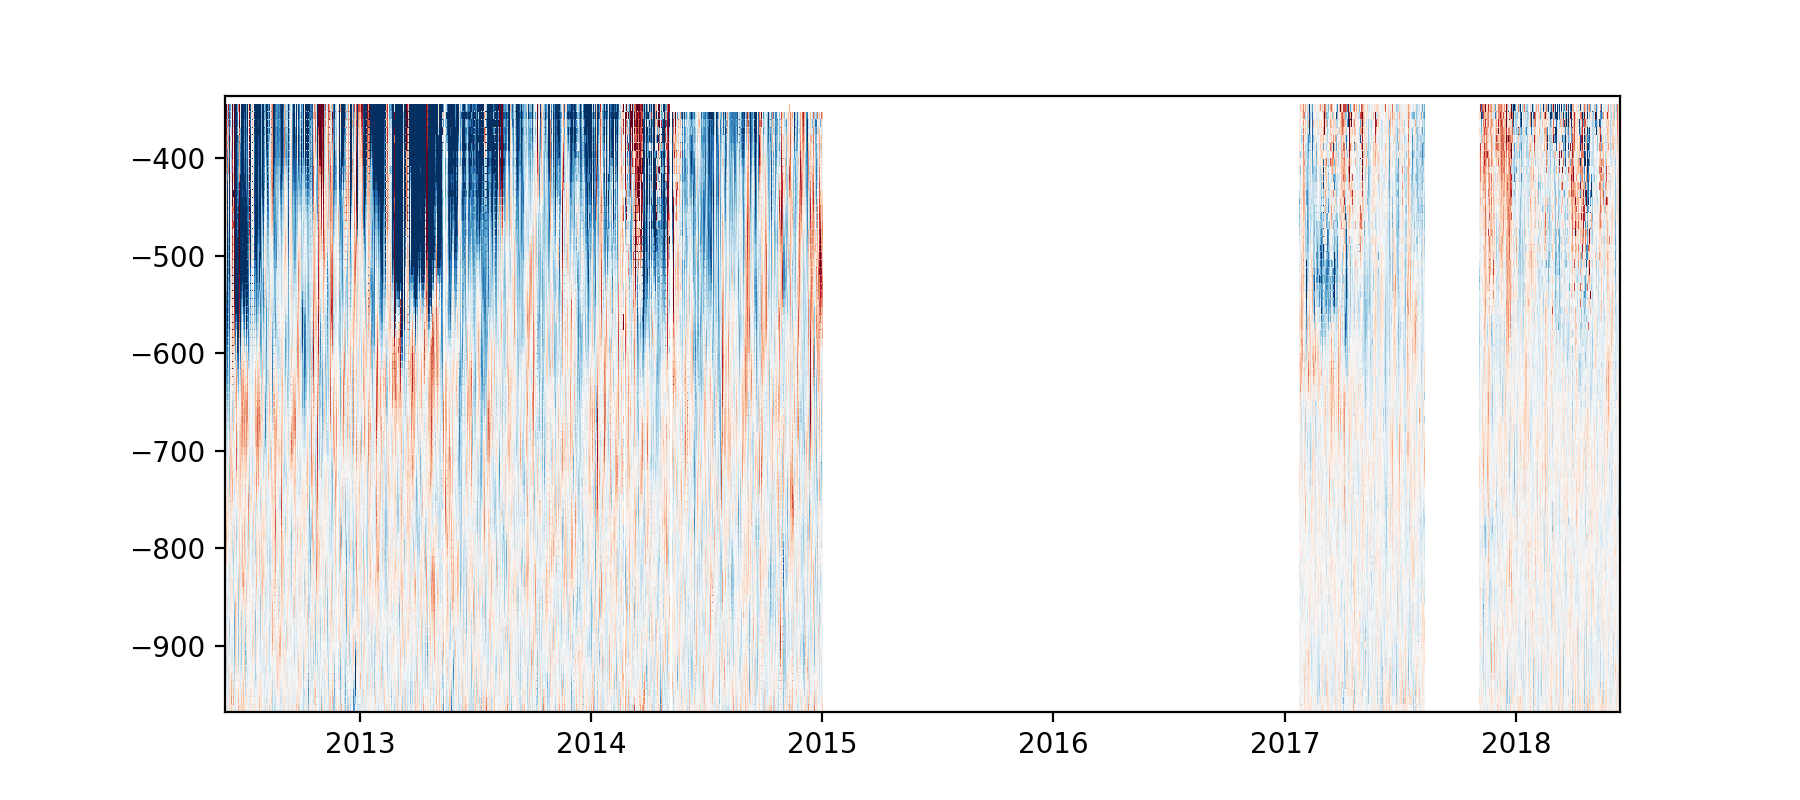

In [59]:
# plot to check data quality
fig,ax = plt.subplots(figsize=(9,4))
ax.pcolormesh(ds.time, -ds.depth, ds.u.T, rasterized=True, cmap='RdBu_r', vmin=-0.20, vmax=0.20)
plt.show()

## Second file

Open the next NetCDF file, sort depth in ascending order, drop lat and long dimensions, and interpolate over specific depths.

In [64]:
# second file
ds0 = xr.open_dataset('../../../Data/AxisAll/Axis75/7.nc')   # open next file

ds0 = ds0.sortby('depth', ascending=True)        # sort depth in ascending order
ds0 = ds0.drop_dims('longitude')                 # drop lat and long dims
ds0 = ds0.drop_dims('latitude')
ds0 = ds0.interp(depth=depths,method='linear')   # interpolate onto specific depths

print(ds0)

<xarray.Dataset>
Dimensions:  (depth: 80, time: 812)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-14T00:07:30.000003328 ... 2018-06-22T10:52:30
  * depth    (depth) int64 336 344 352 360 368 376 ... 928 936 944 952 960 968
Data variables:
    u        (time, depth) float64 nan -0.009305 -0.03014 ... nan nan nan
    v        (time, depth) float64 nan 0.03647 0.07153 0.02722 ... nan nan nan
    w        (time, depth) float64 nan -0.002064 -0.003515 ... nan nan nan
    temp     (time) float32 276.775 276.79 276.815 276.84332 ... nan nan nan
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.c

<IPython.core.display.Javascript object>


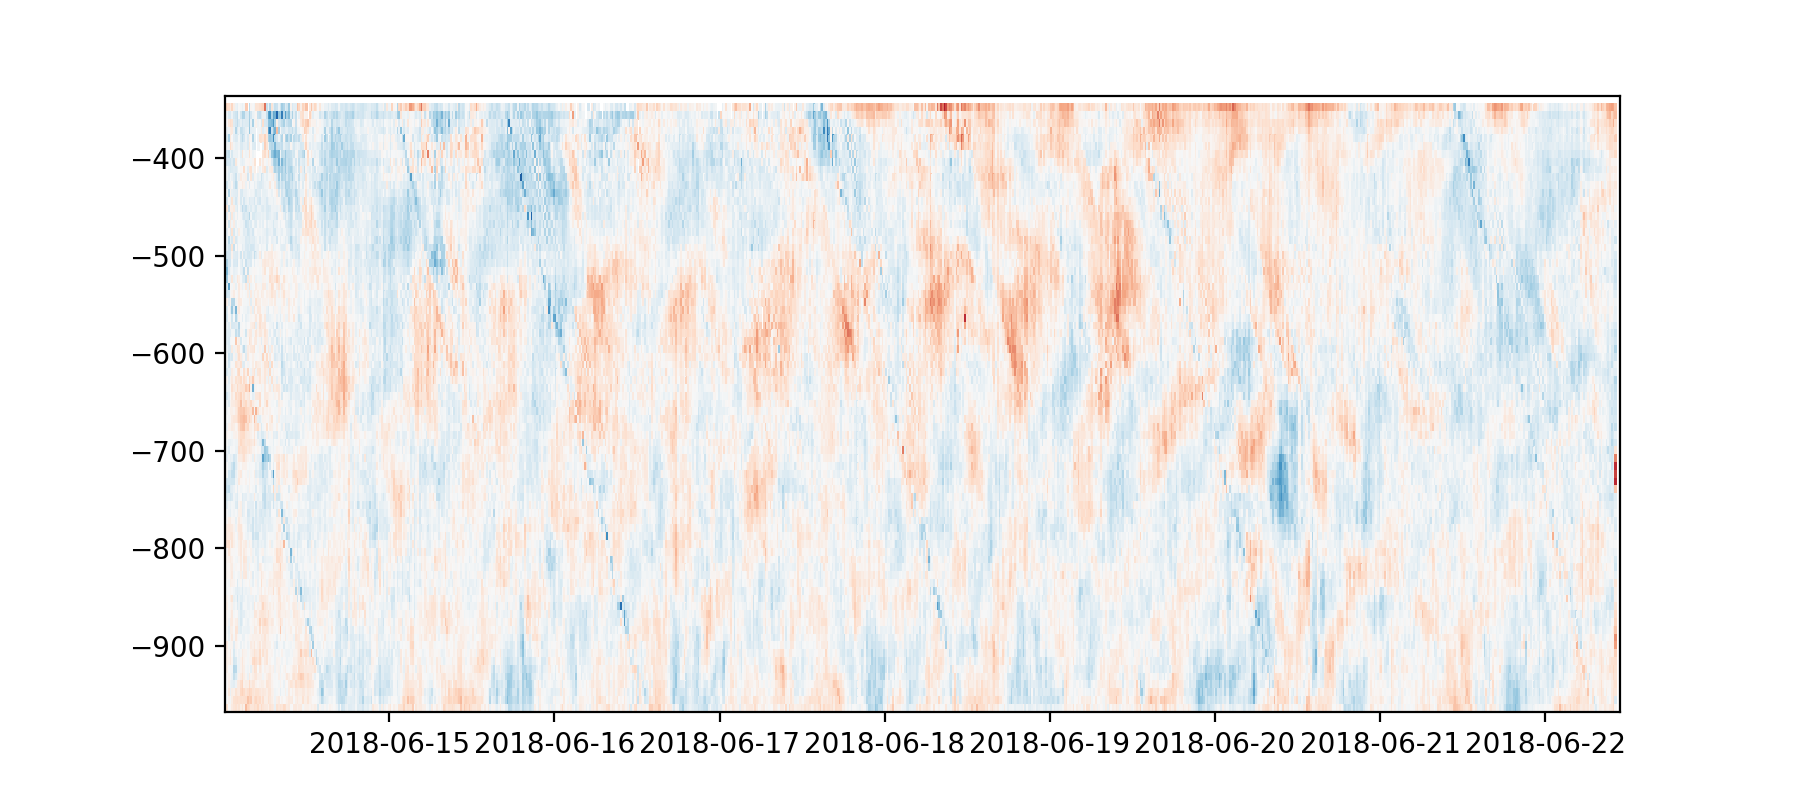

In [65]:
# plot to check data quality
fig,ax = plt.subplots(figsize=(9,4))
ax.pcolormesh(ds0.time, -ds0.depth, ds0.u.T, rasterized=True, cmap='RdBu_r', vmin=-0.20, vmax=0.20)
plt.show()

## Combine files

Combines first and next files. If necessary, remove bad data sections. Save file to new NetCDF.

In [66]:
# combine files
ds1 = xr.combine_by_coords([ds0, ds])      # combine files

# start = 90099                           # to remove bad data
# end = 112732
# print(ds1.time[start:end])
# ds1.u[start:end,:] = np.nan
# ds1.v[start:end,:] = np.nan
# ds1.w[start:end,:] = np.nan

print(ds1)
ds1.to_netcdf('../../../Data/AxisAll/Axis75/1234567.nc')   # save to new NetCDF file

<xarray.Dataset>
Dimensions:  (depth: 80, time: 162119)
Coordinates:
  * depth    (depth) int64 336 344 352 360 368 376 ... 928 936 944 952 960 968
  * time     (time) datetime64[ns] 2012-06-02T05:07:29.999996672 ... 2018-06-22T10:52:30
Data variables:
    u        (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    v        (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    w        (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    temp     (time) float32 nan nan nan nan nan ... 276.85333 276.85 nan nan nan


<IPython.core.display.Javascript object>


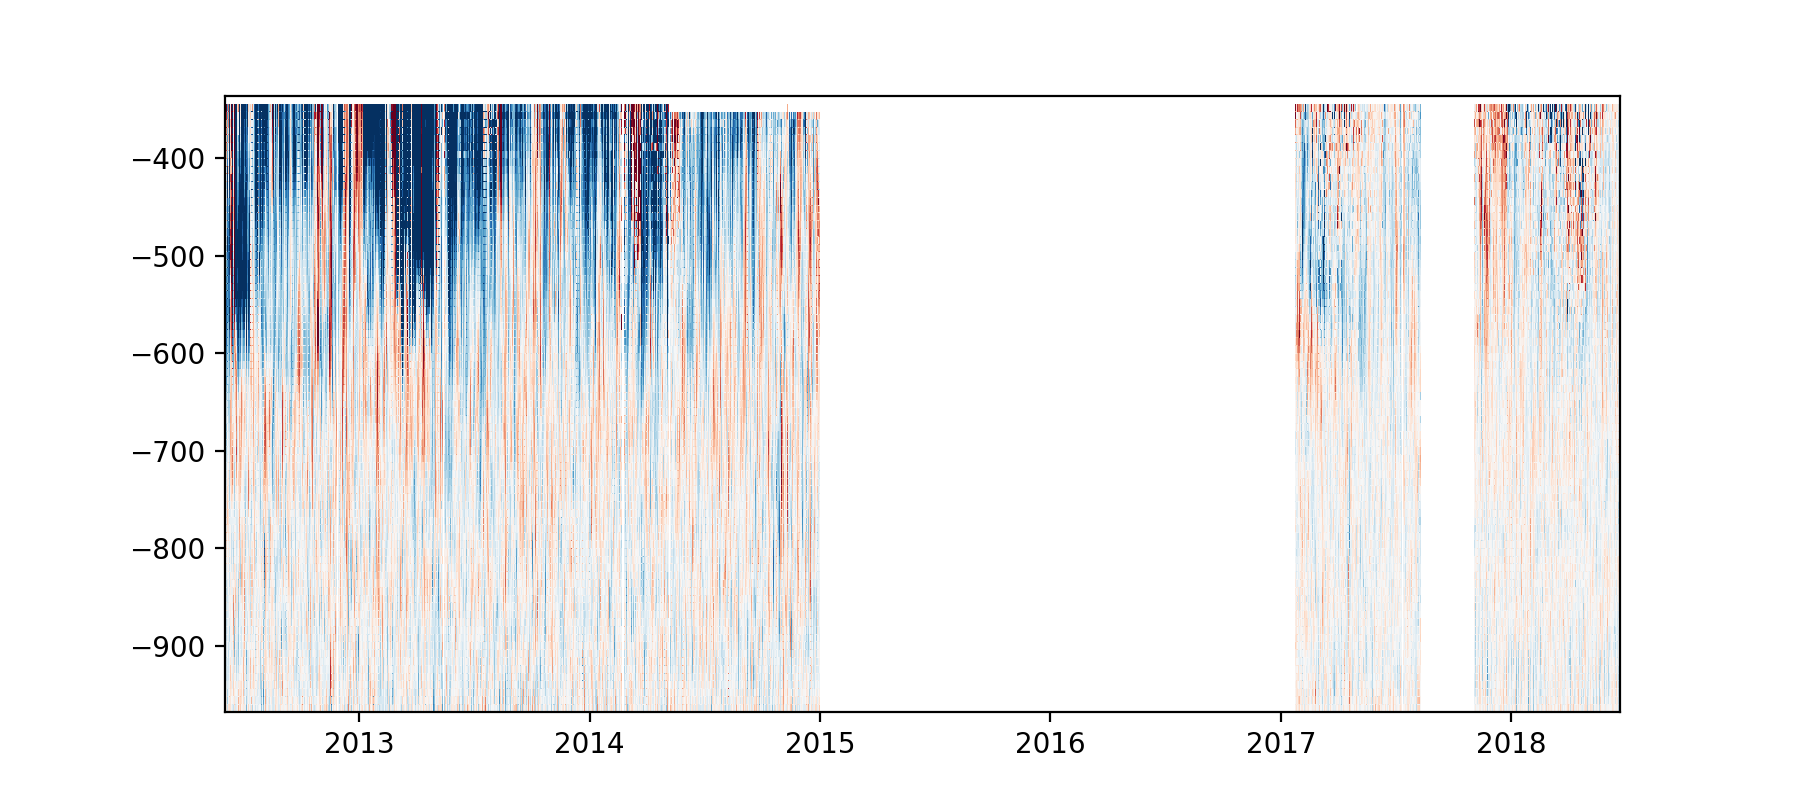

In [67]:
# plot to check data quality
fig,ax = plt.subplots(figsize=(9,4))
ax.pcolormesh(ds1.time, -ds1.depth, ds1.u.T, rasterized=True, cmap='RdBu_r', vmin=-0.20, vmax=0.20)
plt.show()